## Import

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import datetime

sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [277]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [278]:
print(len(train))
print(len(test))

3000
4398


In [279]:
data = pd.concat([train, test])

In [280]:
data = data[train.columns]

## Data Info

In [281]:
data.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0


In [282]:
data = data.drop(['imdb_id', 'tagline', 'poster_path', 'overview', 'title', 'cast', 'crew'], axis=1)

In [283]:
data.describe()

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 16 columns):
id                       7398 non-null int64
belongs_to_collection    1481 non-null object
budget                   7398 non-null int64
genres                   7375 non-null object
homepage                 2366 non-null object
original_language        7398 non-null object
original_title           7398 non-null object
popularity               7398 non-null float64
production_companies     6984 non-null object
production_countries     7241 non-null object
release_date             7397 non-null object
runtime                  7392 non-null float64
spoken_languages         7336 non-null object
status                   7396 non-null object
Keywords                 6729 non-null object
revenue                  3000 non-null float64
dtypes: float64(3), int64(2), object(11)
memory usage: 982.5+ KB


## Missing Values

### Belongs Collection

In [285]:
data['belongs_to_collection'].isnull().sum()

5917

In [286]:
data['belongs_to_collection'] = data['belongs_to_collection'].apply(lambda x: 'Not' if pd.isnull(x) else 'Yes')

In [287]:
data['belongs_to_collection'].value_counts()

Not    5917
Yes    1481
Name: belongs_to_collection, dtype: int64

### Homepage

In [288]:
data['homepage'].isnull().sum()

5032

In [289]:
data['homepage'] = data['homepage'].apply(lambda x: 'Not' if pd.isnull(x) else 'Yes')

In [290]:
data['belongs_to_collection'].value_counts()

Not    5917
Yes    1481
Name: belongs_to_collection, dtype: int64

### Status

In [291]:
data['status'].value_counts()

Released           7385
Rumored               6
Post Production       5
Name: status, dtype: int64

In [292]:
data['status'].isna().sum()

2

In [293]:
data['status'] = data['status'].fillna('Released')

### Runtime

In [294]:
data['runtime'].isnull().sum()

6

In [295]:
data['runtime'] = data['runtime'].fillna(data['runtime'].median())

### Release Date

In [296]:
data['release_date'].isnull().sum()

1

In [297]:
data['release_date'].mode()

0    9/10/10
dtype: object

In [298]:
data['release_date'] = data['release_date'].fillna(data['release_date'].mode()[0])

In [299]:
data['release_date'].isnull().sum()

0

### Genres

In [300]:
data['genres'] = data['genres'].apply(lambda x: {} if pd.isna(x) else str(x).replace("'", '"')).apply(lambda x: str(x).replace("[", '')).apply(lambda x: str(x).replace("]", ''))

In [301]:
data['genres'] = data['genres'].apply(lambda x: json.loads(x.split("}")[0]+'}')).apply(lambda x: list(x.values())[1] if(len(list(x.values()))>0) else '{}')

### Keywords

In [302]:
data['Keywords'].head(1)

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
Name: Keywords, dtype: object

In [303]:
data['Keywords'] = data['Keywords'].apply(lambda x: 0 if pd.isna(x) else len(ast.literal_eval(x)))

## Companies

In [304]:
data['production_companies'].head(1)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
Name: production_companies, dtype: object

In [305]:
data['production_companies'] = data['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [306]:
comps = list(data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [307]:
unique_comps = []
for i in range(len(comps)):
    if(len(comps[i])>0):
        unique_comps.append(comps[i][0])
    else:
        unique_comps.append('None')
        
data['production_companies'] = unique_comps

### Countries

In [308]:
data['production_countries'].head(1)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [309]:
data['production_countries'] = data['production_countries'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [310]:
count = list(data['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [311]:
unique_count = []
for i in range(len(count)):
    if(len(count[i])>0):
        unique_count.append(count[i][0])
    else:
        unique_count.append('None')
        
data['production_countries'] = unique_count

### Spoken Lang

In [312]:
data['spoken_languages'] = data['spoken_languages'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

count = list(data['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

unique_count = []
for i in range(len(count)):
    if(len(count[i])>0):
        unique_count.append(count[i][0])
    else:
        unique_count.append('None')
        
data['spoken_languages'] = unique_count

### Year and Month

In [313]:
data['release_date']=pd.to_datetime(data['release_date'], errors='coerce')

In [314]:
# data['year'] = data['release_date'].dt.year
# data['month'] = data['release_date'].dt.month

In [315]:
dates = []
for i in data['release_date']:
    if i.year>2017:
        digits = str(i.year)[2:4]
        date = str(i.day)+'-'+str(i.month)+'-19'+digits
        dates.append(date)
    else:
        dates.append(i)

In [316]:
data['release_date'] = dates

In [317]:
data['release_date']=pd.to_datetime(data['release_date'], errors='coerce')

In [318]:
data['year'] = data['release_date'].dt.year
data['month'] = data['release_date'].dt.month

In [319]:
del data['release_date']

## Data After Cleaning

In [320]:
data.head(5)

,id,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,revenue,year,month
0,1,Yes,14000000,Comedy,Not,en,Hot Tub Time Machine 2,6.575393,Paramount Pictures,United States of America,93.0,English,Released,4,12314651.0,2015,2
1,2,Yes,40000000,Comedy,Not,en,The Princess Diaries 2: Royal Engagement,8.248895,Walt Disney Pictures,United States of America,113.0,English,Released,4,95149435.0,2004,8
2,3,Not,3300000,Drama,Yes,en,Whiplash,64.299990,Bold Films,United States of America,105.0,English,Released,12,13092000.0,2014,10
3,4,Not,1200000,Thriller,Yes,hi,Kahaani,3.174936,None,India,122.0,English,Released,7,16000000.0,2012,3
4,5,Not,0,Action,Not,ko,마린보이,1.148070,None,South Korea,118.0,한국어/조선말,Released,0,3923970.0,2009,2


## EDA

### Revenue by Year

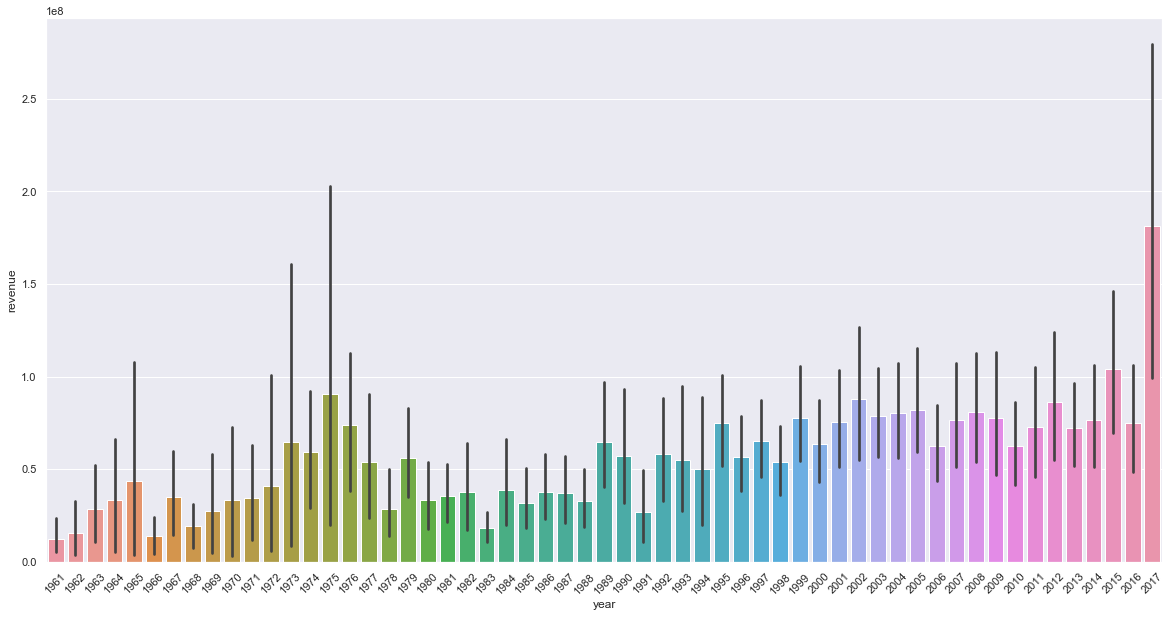

In [321]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data=data[data['year']>1960], x='year', y='revenue');

### Revenue by Month

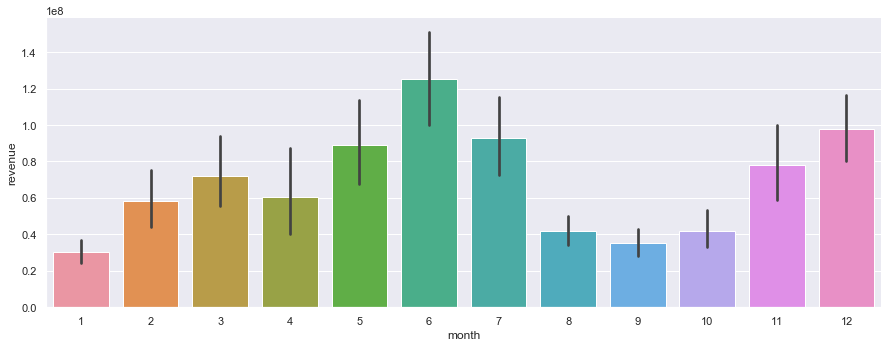

In [322]:
sns.catplot(data=data, x='month', y='revenue', kind='bar', height=5, aspect=2.5);

### Highest Movie Revenue of Each Year

In [323]:
year_revenue = data[data['year']>1960].groupby(['year','original_title']).agg({'revenue':sum})
g = year_revenue['revenue'].groupby(level=0, group_keys=False)

In [324]:
g.nlargest(1)

year  original_title                                        
1961  The Guns of Navarone                                      2.890000e+07
1962  The Longest Day                                           5.010000e+07
1963  Cleopatra                                                 7.100000e+07
1964  Mary Poppins                                              1.022727e+08
1965  Thunderball                                               1.411957e+08
1966  Hawaii                                                    3.456222e+07
1967  You Only Live Twice                                       1.115848e+08
1968  The Odd Couple                                            4.452723e+07
1969  Butch Cassidy and the Sundance Kid                        1.023089e+08
1970  Love Story                                                1.364000e+08
1971  Diamonds Are Forever                                      1.160195e+08
1972  The Godfather                                             2.450664e+08
1973  The Exorc

### Highest Movie Revenue of Each Month

In [325]:
year_revenue = data.groupby(['month','original_title']).agg({'revenue':sum})
g = year_revenue['revenue'].groupby(level=0, group_keys=False)

In [326]:
g.nlargest(1)

month  original_title                             
1      RoboCop                                        2.426890e+08
2      Zootopia                                       1.023784e+09
3      Beauty and the Beast                           1.262886e+09
4      The Avengers                                   1.519558e+09
5      Pirates of the Caribbean: On Stranger Tides    1.045714e+09
6      Transformers: Dark of the Moon                 1.123747e+09
7      The Dark Knight Rises                          1.084939e+09
8      Signs                                          4.082479e+08
9      Gravity                                        7.163927e+08
10     Spectre                                        8.806746e+08
11     The Hobbit: An Unexpected Journey              1.021104e+09
12     The Hobbit: The Desolation of Smaug            9.584000e+08
Name: revenue, dtype: float64

### Budget and Revenue

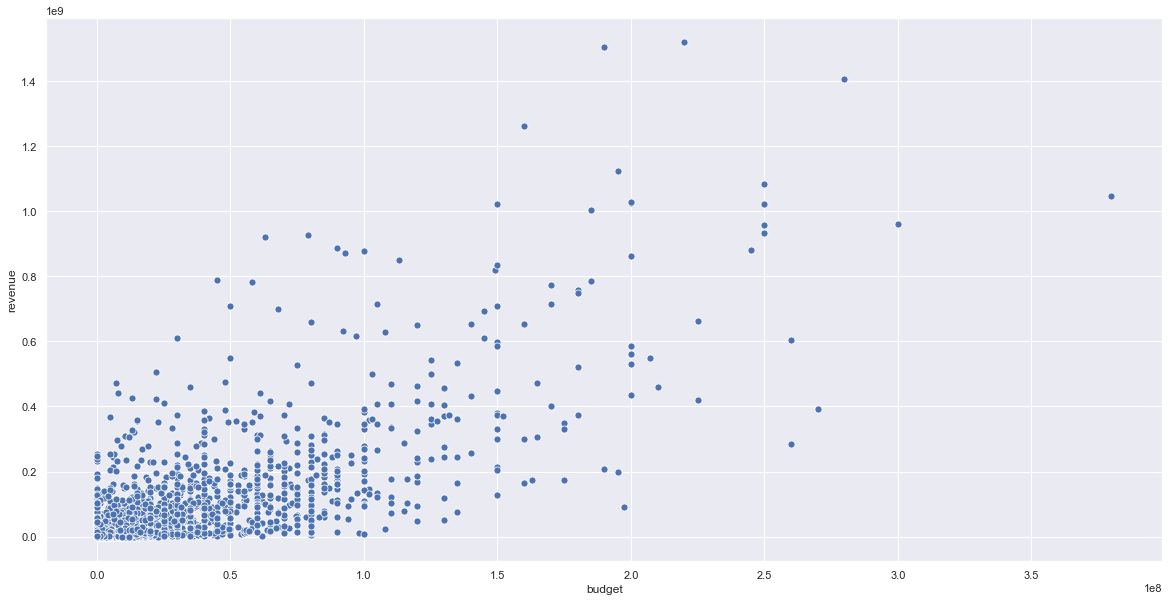

In [327]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='budget', y='revenue', s=50);

### Popularity and Revenue

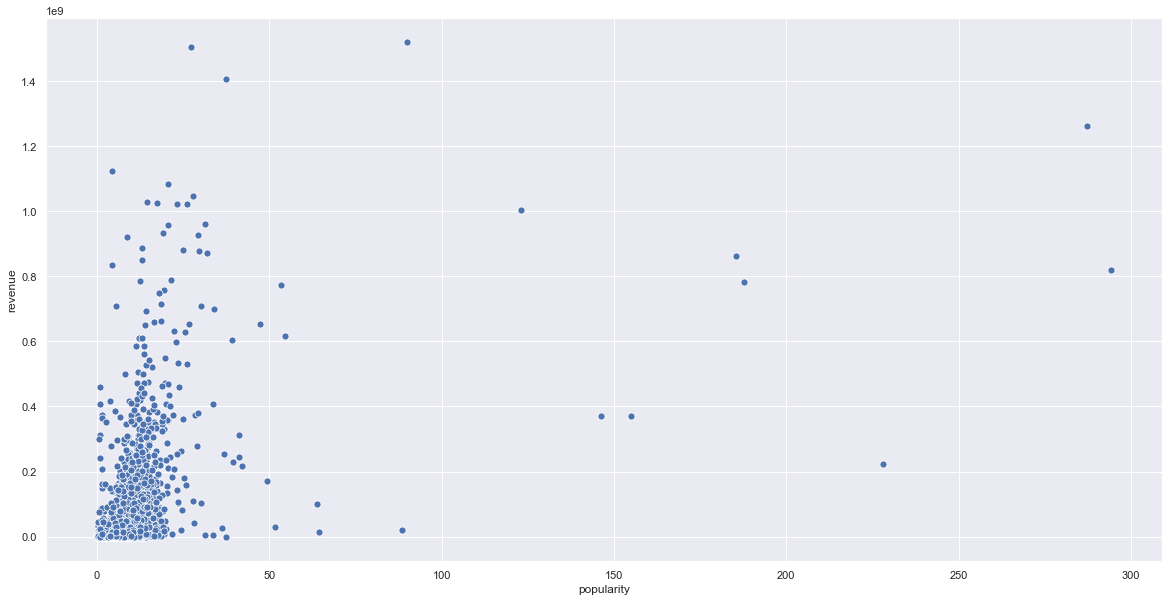

In [328]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='popularity', y='revenue', s=50);

### Runtime and Revenue

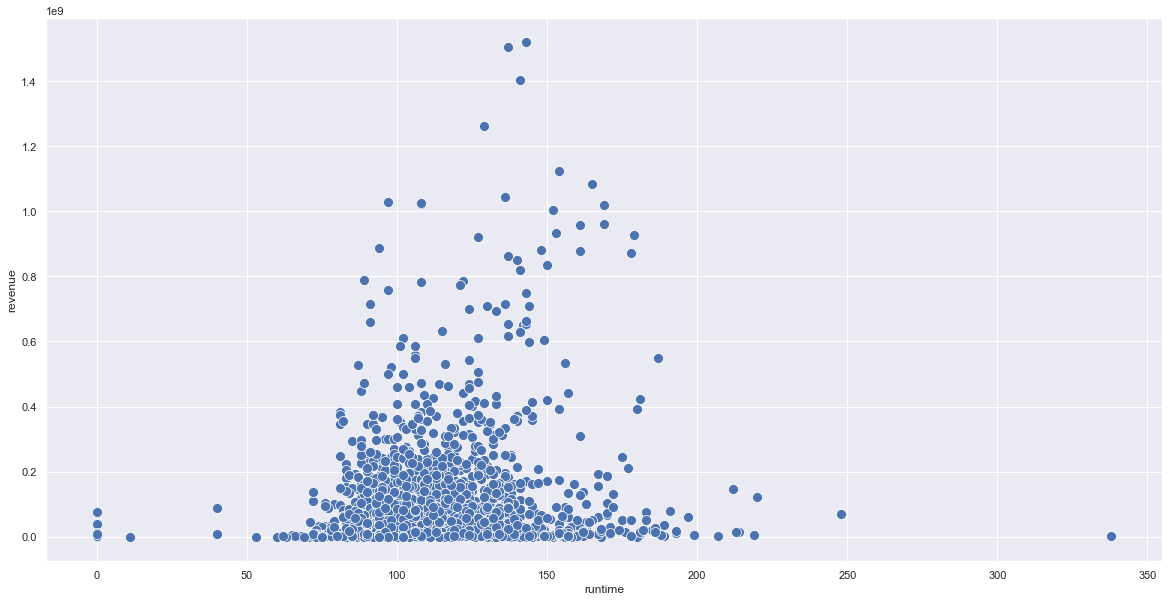

In [329]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='runtime', y='revenue', s=100);

### Genres Count

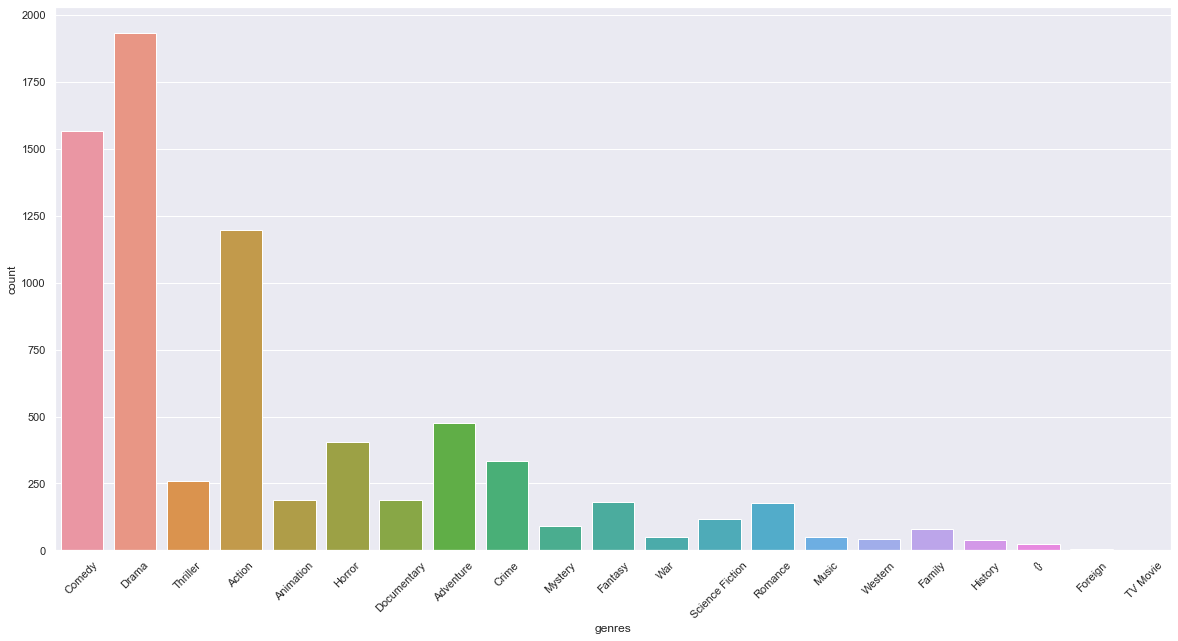

In [330]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(data['genres']);

### Revenue by Genre

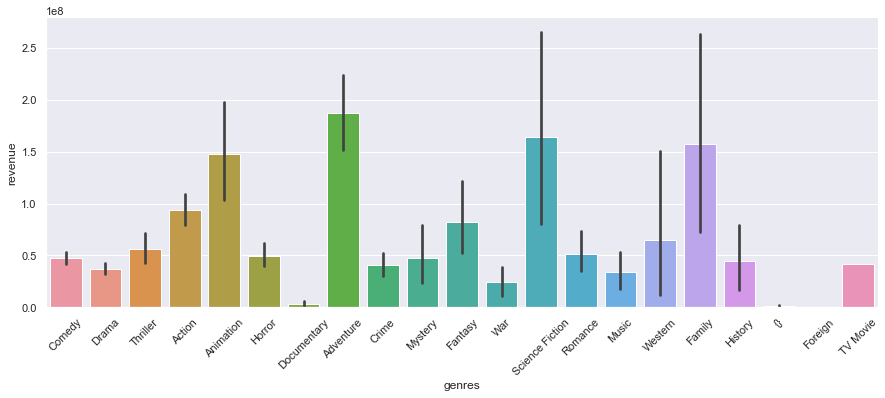

In [331]:
g = sns.catplot(data=data, x='genres', y='revenue', kind='bar', height=5, aspect=2.5)
g.set_xticklabels(rotation=45);

### Genre of Each Year

In [332]:
genre_year = data[data['year']>1970].groupby(['year', 'genres']).agg({'genres':'count'})
g = genre_year['genres'].groupby(level=0, group_keys=False)
g = g.nlargest(1)

In [333]:
genres = g.index.droplevel(level=0)
year = g.index.droplevel(level=1)

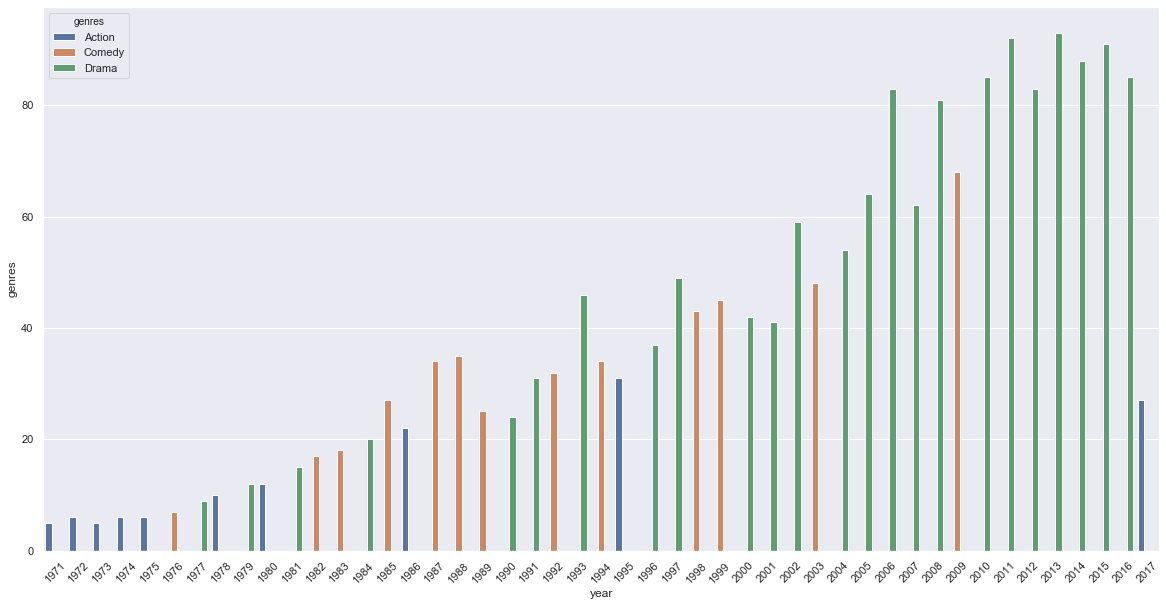

In [334]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x=year, y=g, hue=genres);

### Original Language Count

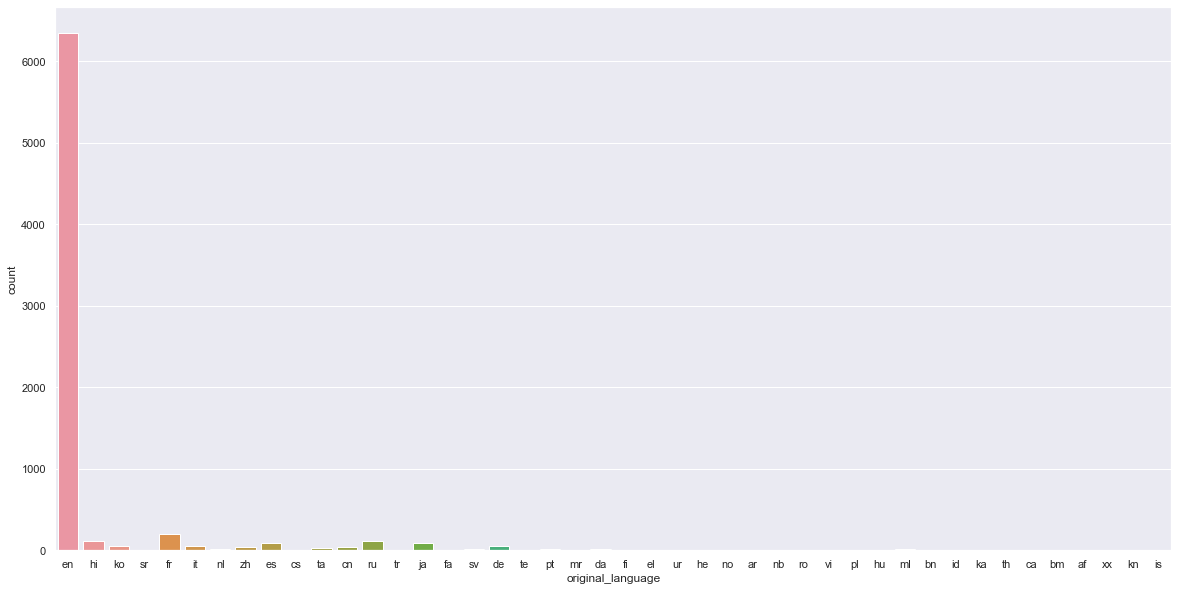

In [335]:
plt.figure(figsize=(20,10))
sns.countplot(data['original_language']);

### Original Language Revenue

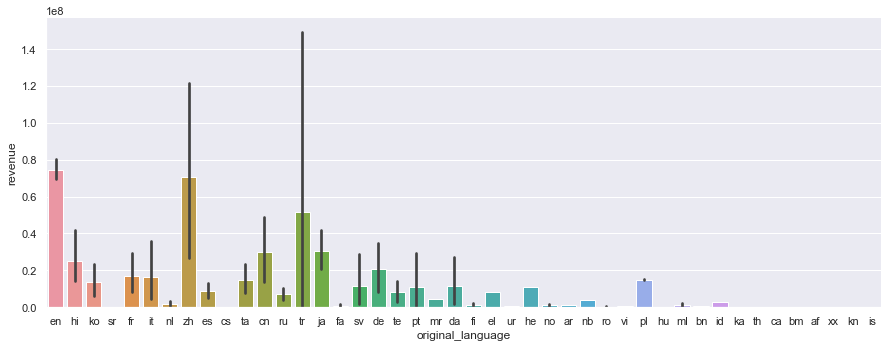

In [336]:
sns.catplot(data=data, y='revenue', x='original_language', kind='bar', height=5, aspect=2.5);

### Original Language Popularity

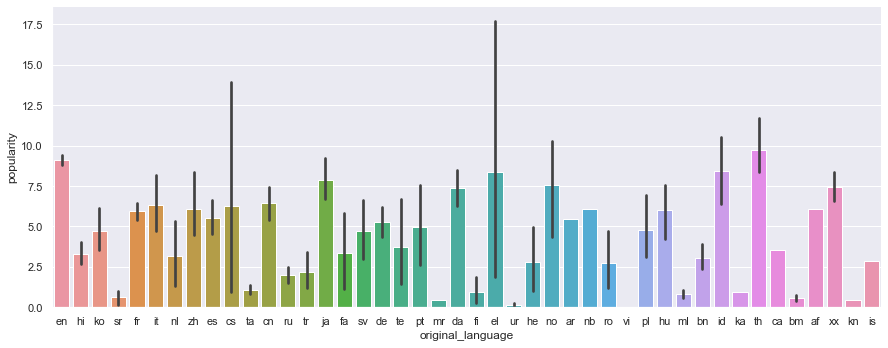

In [337]:
sns.catplot(data=data, y='popularity', x='original_language', kind='bar', height=5, aspect=2.5);

### Companies Count

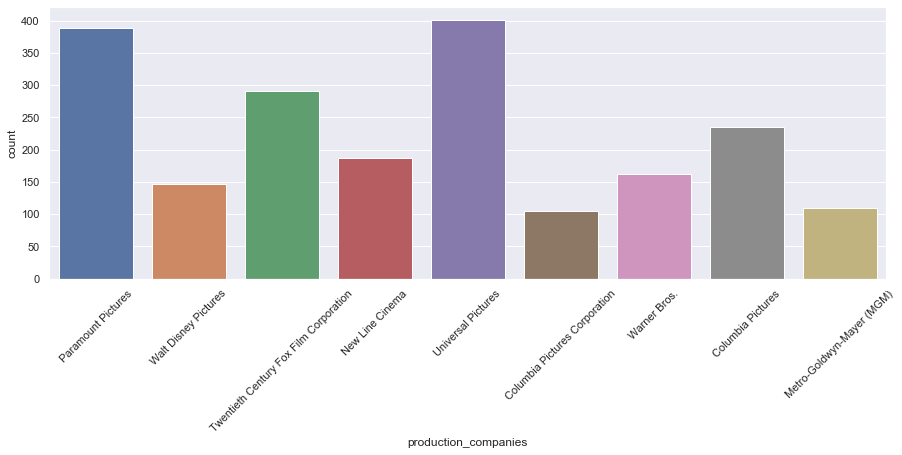

In [338]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
top_comp = data['production_companies'].value_counts().head(10).index[1:]
top_comp = data[data['production_companies'].isin(top_comp)]
sns.countplot(top_comp['production_companies']);

### Company Revenue 

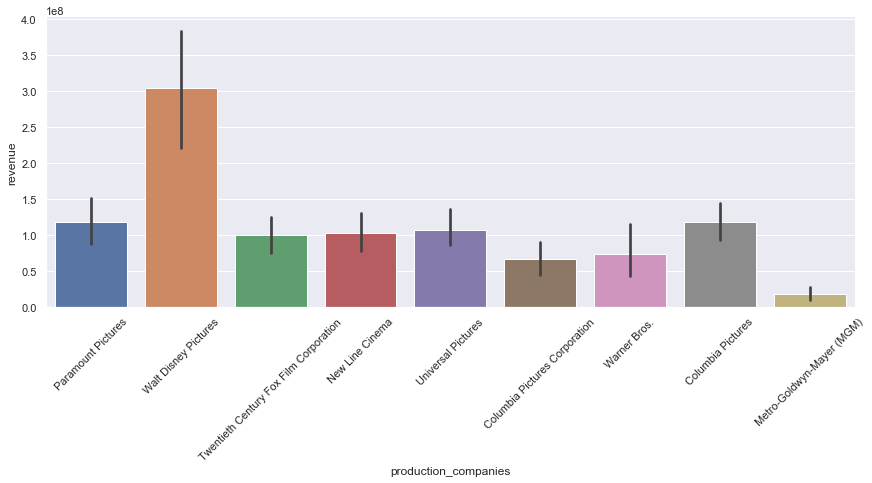

In [339]:
g = sns.catplot(data=top_comp, y='revenue', x='production_companies', kind='bar', height=5, aspect=2.5)
g.set_xticklabels(rotation=45);